# 1) Conjunto de Datos

## a) Bajar los datos

   Repositorio: [github.com/MateoRomano02/tp_equidad](https://github.com/MateoRomano02/tp_equidad)

   Ruta del archivo: `../data/raw/german.data`

## b) Preguntas de Datasheets for Datasets
   ### i) Motivación

   1. **Propósito del conjunto de datos:**

      Este dataset se centra en la evaluación del riesgo crediticio, clasificando a los solicitantes de crédito como de *"buen" / "mal" riesgo* en función de diversos atributos personales y financieros.
      
      No encontramos información precisa respecto a la generación de los datos, su contexto o el motivo por el que fueron recopilados. La falta de detalles es criticada por distintos usuarios que comparten y consumen este dataset, e incluso en 2019 se demostró que en Statlog está publicada una tabla de códigos incorrecta, lo que implica features mal interpretados (Grömping, 2019). 
      
      Estamos considerando usar la versión corregida publicada bajo el nombre *[Versión corregida (South German Credit)](https://archive.ics.uci.edu/ml/datasets/South+German+Credit)*

   2. **Entidad creadora:**

      El conjunto de datos Statlog German Credit Data fue donado a la UCI por el profesor Hans Hofmann de la Universidad de Hamburgo el 16/11/1994. Hofmann donó los datos que se encargó de transcribir del apéndice del libro de Fahrmeir y Hamerle (1984), y si bien ellos documentaron los datos, inicialmente fueron procesados por W.M. Häußler como parte de su tesis doctoral (1979 - 1981) (Grömping, 2019).

   ### ii) Composición

   1. **Instancias:** 

      Las instancias representan personas a las que se les otorgó créditos por medio de un gran banco regional en el sur de Alemania. Cada instancia corresponde a un único crédito/deudor. No hay múltiples tipos de instancias o entidades interactuando; el conjunto de datos se centra en perfiles individuales de créditos/deudores y sus características.
      
      Hay un total de 1000 instancias, compuestas por 300 créditos clasificados como "malos" y 700 "buenos". La clasificación "bueno" o "malo" se basa en si el deudor cumplió o no con las condiciones del contrato de crédito.

   ### iii) Proceso de recopilación

   1. **¿Cómo se adquirieron los datos?**

      Los datos fueron adquiridos a partir de registros reales de operaciones bancarias, correspondientes a solicitudes de crédito realizadas entre 1973 y 1975 en un gran banco regional del sur de Alemania.

   2. **¿Los datos fueron observados directamente, informados por los sujetos o indirectamente inferidos/derivados de otros datos?**

      Fueron derivados de otros datos (tésis doctoral de W.M. Häußler -> recopilados por Fahrmeir y Hamerle -> transcritpos por Hofmann)

   3. **Si los datos fueron informados por los sujetos o indirectamente inferidos/derivados de otros datos, ¿se validaron/verificaron? Si es así, describa cómo.**

      Sí. Hans Hofmann transcribió manualmente las primeras 1000 filas y verificó los datos mecanografiados contra una tabla resumen del libro original. Además, se compararon versiones posteriores del conjunto de datos, detectando mínimos errores tipográficos y algunas discrepancias categóricas, pero con valores brutos mayormente consistentes.


### iv) Preprocesamiento/limpieza/etiquetado

1. **¿Se realizó algún preprocesamiento/limpieza/etiquetado de los datos (por ejemplo, discretización o agrupamiento, tokenización, etiquetado de partes del discurso, extracción de atributos SIFT, eliminación de instancias, procesamiento de valores faltantes)?**

   Sí. Los principales son:

   - Corrección de una tabla de códigos errónea en la versión Statlog/UCI, que representaba incorrectamente varias variables categóricas:
      - Intercambio de niveles incorrectos en atributos como `people_liable` (A18) y `foreign_worker` (A20).
      - Recodificación de columnas `pers` y `gastarb` restando sus valores de 3, mediante código R proporcionado por los autores.
   - Discretización de variables numéricas, transformándolas en ordinales o binarias.
   - Aunque no se documenta un manejo explícito de valores faltantes, se corrigieron errores tipográficos menores y se verificaron las transcripciones contra fuentes originales.

### v) Usos

1. Este conjunto de datos se ha convertido en un benchmark clásico de clasificación en riesgos crediticios. Ha sido empleado en numerosos estudios académicos, cursos universitarios y bibliotecas de aprendizaje automático:

   - Se utiliza en materiales docentes para ilustrar regresión logística, análisis discriminante, árboles de decisión y redes neuronales en tareas de credit scoring (Stelzer, 2019). Además, se encuentra integrado en plataformas como TensorFlow Datasets (Google, 2023), y se han creado versiones derivadas en Kaggle para competencias y análisis reproducibles.

   - Es un recurso clave en investigaciones sobre *fairness*, dada la presencia de variables sensibles como el género. Por ejemplo, la biblioteca `fairml` en `R` incorpora este conjunto para ilustrar métodos de ajuste de sesgos (Schliep, 2018).

   En términos de sistemas, no existe un software comercial específico asociado, pero sí numerosos repositorios de código abierto que lo emplean con bibliotecas como `scikit-learn` o `keras`. Además, es ampliamente referenciado en estudios comparativos de modelos supervisados (Lemke et al., 2009; Gómez, 2022).

2. **Repositorios**

   a. **UCI Machine Learning Repository**
      - [Versión original (Statlog)](https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data))
      - [Versión corregida (South German Credit)](https://archive.ics.uci.edu/ml/datasets/South+German+Credit)

   b. **Open Data LMU**
      - [DOI: 10.5282/ubm/data.23](https://doi.org/10.5282/ubm/data.23)

   c. **Kaggle**
      - [German Credit Dataset](https://www.kaggle.com/uciml/german-credit)


**Fuentes:**

   *Grömping, U. (2019). South German Credit Data: Correcting a Widely Used Data Set. Reports in Mathematics, Physics and Chemistry, 04/2019. Fachbereich II, Beuth Hochschule für Technik Berlin. Disponible en: http://www1.beuth-hochschule.de/FB_II/reports/welcome.htm*

   *Gómez, D. (2022). Introducción al aprendizaje automático: Casos prácticos con Python. Editorial Alfaomega.*

   *Google. (2023). German Credit Numeric Dataset. TensorFlow Datasets. Recuperado de https://www.tensorflow.org/datasets/catalog/german_credit_numeric*

   *Kaggle. (s.f.). German Credit Risk Dataset. Recuperado el 21 de mayo de 2025, de https://www.kaggle.com/datasets*

   *Lemke, C., Gabrys, B., & Buhmann, J. M. (2009). Automatic selection of spectral channels using mutual information. IEEE Transactions on Pattern Analysis and Machine Intelligence, 28(12), 1939–1951. https://doi.org/10.1109/TPAMI.2006.248*

   *Schliep, K. (2018). fairml: Fair Machine Learning. The Comprehensive R Archive Network (CRAN). Recuperado de https://cran.r-project.org/package=fairml*

   *Stelzer, E. (2019). Modelos de evaluación de riesgo crediticio aplicando técnicas de aprendizaje supervisado. Universidad Nacional de La Plata. Recuperado de http://sedici.unlp.edu.ar/handle/10915/102542*

   *UCI Machine Learning Repository. (1994). Statlog (German Credit Data) Data Set. University of California, Irvine. Recuperado de https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)*

## c) EDA

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
raw_path = "../data/raw/german.data"
df = pd.read_csv(raw_path, delim_whitespace=True, header=None)

# Define column names according to dataset documentation
columns = [
    "checking_account_status", "duration_months", "credit_history", "purpose",
    "credit_amount", "savings_account_bonds", "employment_since",
    "installment_rate_pct", "personal_status_sex", "other_debtors_guarantors",
    "residence_since", "property", "age", "other_installment_plans", "housing",
    "existing_credits", "job", "dependents", "telephone", "foreign_worker",
    "target"
]

# Assign column names
df.columns = columns

# Map target values: 1 = Good, 2 = Bad
df["target"] = df["target"].map({1: "Good", 2: "Bad"})

# Preview first few rows
df.head()

C:\Users\lean3\AppData\Local\Temp\ipykernel_19444\1428164586.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(raw_path, delim_whitespace=True, header=None)


,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account_bonds,employment_since,installment_rate_pct,personal_status_sex,other_debtors_guarantors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,Good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,Bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,Good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,Good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,Bad


In [14]:
df.to_csv("../data/processed/german_credit_clean.csv", index=False)

print("Shape of the dataset:", df.shape)
print("\nData types:")
print(df.dtypes)

print("\nClass distribution:")
print(df["target"].value_counts(normalize=True))

df.describe()


Shape of the dataset: (1000, 21)

Data types:
checking_account_status     object
duration_months              int64
credit_history              object
purpose                     object
credit_amount                int64
savings_account_bonds       object
employment_since            object
installment_rate_pct         int64
personal_status_sex         object
other_debtors_guarantors    object
residence_since              int64
property                    object
age                          int64
other_installment_plans     object
housing                     object
existing_credits             int64
job                         object
dependents                   int64
telephone                   object
foreign_worker              object
target                      object
dtype: object

Class distribution:
target
Good    0.7
Bad     0.3
Name: proportion, dtype: float64


,duration_months,credit_amount,installment_rate_pct,residence_since,age,existing_credits,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### visualizamos distribucion del target

C:\Users\lean3\AppData\Local\Temp\ipykernel_19444\1896940490.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="target", palette="pastel")


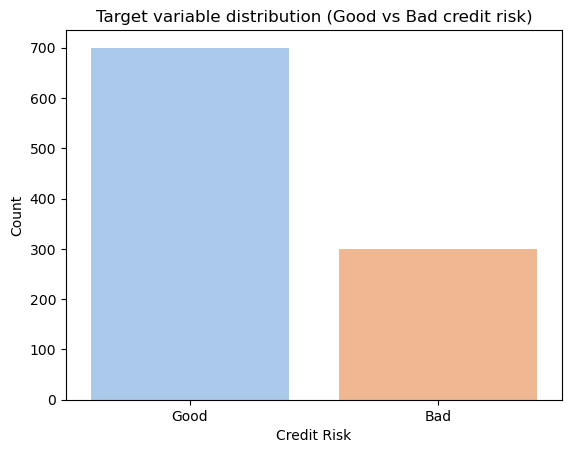

In [15]:
sns.countplot(data=df, x="target", palette="pastel")
plt.title("Target variable distribution (Good vs Bad credit risk)")
plt.xlabel("Credit Risk")
plt.ylabel("Count")
plt.show()

**Observación**: La mayoría de los casos corresponden a personas consideradas como "buen riesgo crediticio" (70%). Hay cierto desbalance de clases, lo cual podría influir en el modelo.


### visualizacion de distribucion de edad (age)

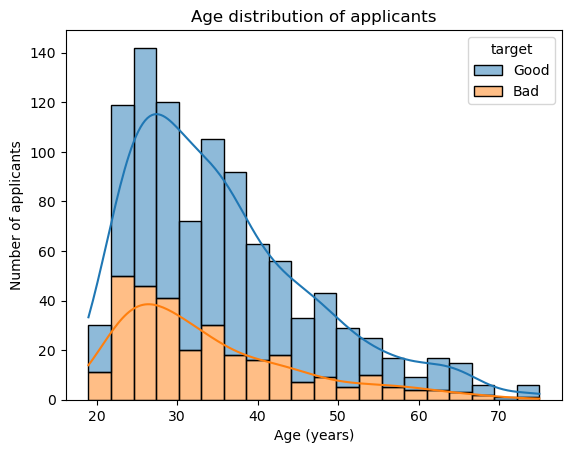

In [16]:
#visualizacion de distribucion de edad (age)
sns.histplot(data=df, x="age", bins=20, kde=True, color="cornflowerblue", hue="target", multiple="stack")
plt.title("Age distribution of applicants")
plt.xlabel("Age (years)")
plt.ylabel("Number of applicants")
plt.show()

**Observación**: La mayor parte de los solicitantes tienen entre 20 y 40 años. Hay una menor cantidad de personas mayores, lo cual podría generar un sesgo por edad.


### Distribución de género (a través de personal_status_sex)

C:\Users\lean3\AppData\Local\Temp\ipykernel_19444\734952105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="personal_status_sex", order=sorted(df["personal_status_sex"].unique()), palette="Set2")


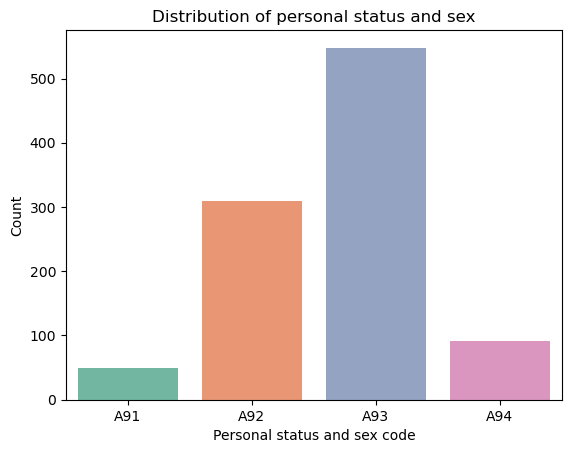

In [17]:
# Count frequency of each category in personal_status_sex
sns.countplot(data=df, x="personal_status_sex", order=sorted(df["personal_status_sex"].unique()), palette="Set2")
plt.title("Distribution of personal status and sex")
plt.xlabel("Personal status and sex code")
plt.ylabel("Count")
plt.show()


**Observación**: La variable `personal_status_sex` codifica género y estado civil. A continuación se detallan los códigos:

| Código | Significado                         |
|--------|-------------------------------------|
| A91    | Hombre, divorciado/separado         |
| A92    | Mujer, divorciada/separada/casada   |
| A93    | Hombre, soltero                     |
| A94    | Hombre, casado/viudo                |
| A95    | Mujer, soltera                      |

En este dataset no hay registros con el código `A95`, lo que sugiere una subrepresentación de mujeres solteras.



### Distribución estimada por género

Se crea una nueva columna `gender` a partir de los códigos en `personal_status_sex`. Esta variable permite identificar si hay una representación desbalanceada entre hombres y mujeres en el conjunto de datos.



C:\Users\lean3\AppData\Local\Temp\ipykernel_19444\2063613911.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="gender", palette="Set2")


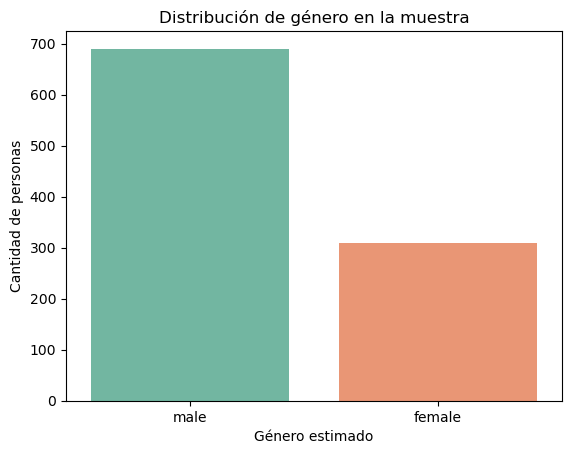

In [18]:
# Map personal_status_sex to gender
df["gender"] = df["personal_status_sex"].map({
    "A91": "male", "A92": "female", "A93": "male", "A94": "male", "A95": "female"
})

# Plot gender distribution
sns.countplot(data=df, x="gender", palette="Set2")
plt.title("Distribución de género en la muestra")
plt.xlabel("Género estimado")
plt.ylabel("Cantidad de personas")
plt.show()


**Observación**: El conjunto de datos presenta una mayor cantidad de personas identificadas como hombres. Esta desproporción debe tenerse en cuenta al evaluar equidad, ya que puede influir en la performance de los modelos.


### Aprobación de crédito según género estimado

Analizamos la variable `target` (buen/mal riesgo crediticio) desagregada por género. Esto permite observar si hay diferencias visibles en las decisiones de aprobación entre hombres y mujeres.


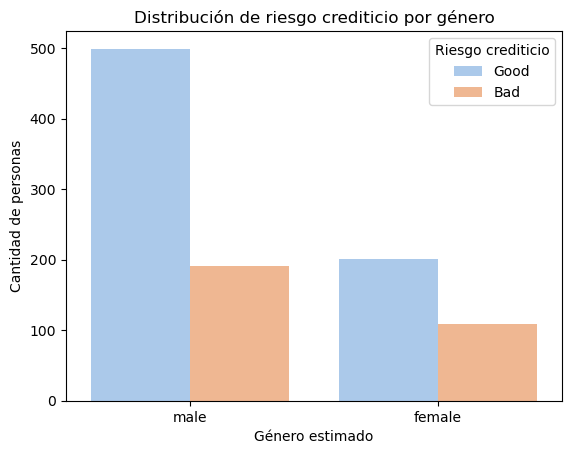

In [19]:
# Plot approval distribution by gender
sns.countplot(data=df, x="gender", hue="target", palette="pastel")
plt.title("Distribución de riesgo crediticio por género")
plt.xlabel("Género estimado")
plt.ylabel("Cantidad de personas")
plt.legend(title="Riesgo crediticio", loc="upper right")
plt.show()


**Observación**: Visualmente, parece que tanto hombres como mujeres reciben en su mayoría una calificación de "buen riesgo". Sin embargo, para evaluar posibles sesgos es necesario comparar proporciones relativas entre géneros.


### Proporción de aprobación crediticia por género

Para analizar posibles sesgos en las decisiones crediticias, calculamos qué porcentaje de personas de cada género fueron clasificadas como "buen riesgo crediticio".


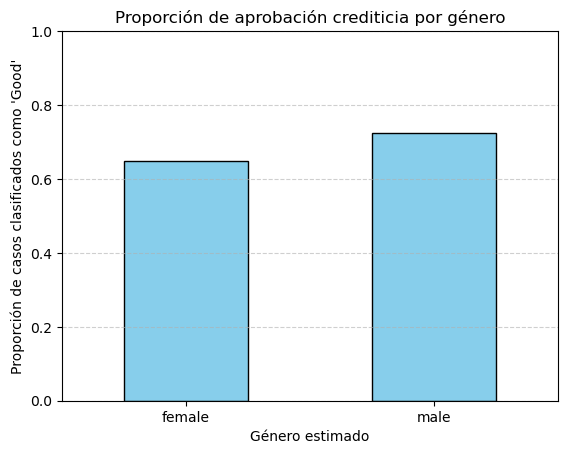

In [20]:
# Calculate proportion of 'Good' outcomes within each gender
approval_rate = df.groupby("gender")["target"].value_counts(normalize=True).unstack()

# Plot proportions
approval_rate["Good"].plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Proporción de aprobación crediticia por género")
plt.xlabel("Género estimado")
plt.ylabel("Proporción de casos clasificados como 'Good'")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


**Observación**: La proporción de personas clasificadas como "buen riesgo" es ligeramente mayor en hombres que en mujeres. Si bien la diferencia no es extrema, podría indicar un sesgo sutil que merece ser evaluado con métricas de equidad más precisas.


### Métrica de Statistical Parity Difference (SPD)

La *Statistical Parity* evalúa si la proporción de resultados positivos (en este caso, “Good”) es similar entre grupos. La diferencia entre esas proporciones se conoce como *Statistical Parity Difference* (SPD).

Si SPD ≈ 0, el modelo trata a ambos géneros por igual.


In [21]:
# Calculate approval rate (Good) per gender
approval_rate = df.groupby("gender")["target"].value_counts(normalize=True).unstack()

# Statistical Parity Difference: P(Good|male) - P(Good|female)
spd = approval_rate.loc["male", "Good"] - approval_rate.loc["female", "Good"]

print(f"Statistical Parity Difference (male - female): {spd:.3f}")


Statistical Parity Difference (male - female): 0.075


**Observación**: El valor de *Statistical Parity Difference* es **0.075**, lo que indica que los hombres tienen una tasa de aprobación 7.5 puntos porcentuales mayor que las mujeres. 

Según los criterios de *group fairness*, esta diferencia podría representar una señal de inequidad en el modelo y debería ser tenida en cuenta en el análisis y la etapa de mitigación.


### Métrica de Equal Opportunity Difference (EOD)

La *Equal Opportunity* evalúa si las personas que realmente son "buen riesgo" tienen la misma probabilidad de ser correctamente clasificadas como tales, independientemente de su grupo (en este caso, género).

La diferencia entre TPRs de cada grupo se conoce como *Equal Opportunity Difference* (EOD). Valores cercanos a 0 indican equidad.


In [22]:
# Filter only people who truly are 'Good'
good_applicants = df[df["target"] == "Good"]

# Calculate TPR: P(pred = Good | true = Good) for each gender
tpr_by_gender = good_applicants["gender"].value_counts(normalize=True)

# Difference: male - female
eod = tpr_by_gender["male"] - tpr_by_gender["female"]

print(f"Equal Opportunity Difference (TPR male - female): {eod:.3f}")


Equal Opportunity Difference (TPR male - female): 0.426


**Observación**: El valor de *Equal Opportunity Difference* (EOD) es **0.426**, lo que significa que los hombres tienen una tasa de verdaderos positivos (TPR) 42.6 puntos porcentuales más alta que las mujeres.

Esta diferencia es considerable e indica que, entre quienes realmente son "buen riesgo crediticio", **los hombres tienen muchas más chances de ser correctamente clasificados como tales**. 

Este resultado sugiere un sesgo de género importante que debería ser abordado en la etapa de mitigación.
